In [81]:
API_KEY = ""
SECRET_KEY = ""

In [82]:
from binance.client import Client
import pandas as pd

<center><h1>Authenticate</h1></center>

In [83]:
client = Client(API_KEY, SECRET_KEY)

<center><h1>Get Tickes</h1></center>

In [84]:
tickers = client.get_all_tickers()
tickers_df = pd.DataFrame(tickers)
tickers_df.head()

,symbol,price
0,ETHBTC,0.07506600
1,LTCBTC,0.00359600
2,BNBBTC,0.01703900
3,NEOBTC,0.00040100
4,QTUMETH,0.00173800


In [85]:
tickers_df.set_index('symbol', inplace=True)

In [86]:
tickers_df.head()

,price
symbol,
ETHBTC,0.07506600
LTCBTC,0.00359600
BNBBTC,0.01703900
NEOBTC,0.00040100
QTUMETH,0.00173800


In [87]:
tickers_df.loc['BTCUSDT']

price    16809.17000000
Name: BTCUSDT, dtype: object

<center><h1>Get Depth</h1></center>

In [88]:
depth = client.get_order_book(symbol='BTCUSDT')
depth

{'lastUpdateId': 27398696943,
 'bids': [['16807.93000000', '0.00663000'],
  ['16807.92000000', '0.30590000'],
  ['16807.91000000', '0.13894000'],
  ['16807.90000000', '0.00670000'],
  ['16807.38000000', '0.01366000'],
  ['16807.32000000', '0.00200000'],
  ['16807.31000000', '0.02800000'],
  ['16807.17000000', '0.04157000'],
  ['16806.72000000', '0.05512000'],
  ['16806.71000000', '0.08378000'],
  ['16806.63000000', '0.10000000'],
  ['16806.62000000', '0.04000000'],
  ['16806.23000000', '0.02400000'],
  ['16806.14000000', '0.06284000'],
  ['16806.09000000', '0.03084000'],
  ['16806.08000000', '0.11961000'],
  ['16806.00000000', '0.00337000'],
  ['16805.98000000', '0.00636000'],
  ['16805.59000000', '0.00887000'],
  ['16805.58000000', '0.01000000'],
  ['16805.49000000', '0.00400000'],
  ['16805.43000000', '0.00999000'],
  ['16805.40000000', '0.00998000'],
  ['16804.80000000', '0.01410000'],
  ['16804.25000000', '0.73681000'],
  ['16804.23000000', '0.17852000'],
  ['16804.16000000', '0.00

In [89]:
depth_df = pd.DataFrame(depth['bids'], columns=['price', 'quantity'])
depth_df.head()

,price,quantity
0,16807.93000000,0.00663000
1,16807.92000000,0.30590000
2,16807.91000000,0.13894000
3,16807.90000000,0.00670000
4,16807.38000000,0.01366000


<center><h1>Get Historical Data</h1></center>

In [90]:
hist = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1MINUTE, "2 year ago UTC")
hist_df = pd.DataFrame(hist, columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
hist_df.info()

In [ ]:
hist_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1636656360000,2.08200000,2.08500000,2.08200000,2.08300000,37515.00000000,1636656419999,78197.13020000,167,28928.00000000,60307.24600000,0
1,1636656420000,2.08400000,2.08600000,2.08300000,2.08600000,64907.20000000,1636656479999,135318.67970000,187,57807.00000000,120526.25760000,0
2,1636656480000,2.08600000,2.08700000,2.08500000,2.08700000,58358.20000000,1636656539999,121771.94190000,134,49629.00000000,103562.85920000,0
3,1636656540000,2.08700000,2.09000000,2.08600000,2.08900000,47066.50000000,1636656599999,98275.63540000,210,28907.50000000,60371.99440000,0
4,1636656600000,2.08800000,2.09100000,2.08700000,2.08900000,69698.70000000,1636656659999,145653.71640000,183,50938.40000000,106468.96820000,0


<center><h1>Preprocess Historical Data</h1></center>

In [ ]:
hist_df['open_time'] = pd.to_datetime(hist_df['open_time']/1000, unit='s')
hist_df['close_time'] = pd.to_datetime(hist_df['close_time']/1000, unit='s')
hist_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2021-11-11 18:46:00,2.08200000,2.08500000,2.08200000,2.08300000,37515.00000000,2021-11-11 18:46:59.999000064,78197.13020000,167,28928.00000000,60307.24600000,0
1,2021-11-11 18:47:00,2.08400000,2.08600000,2.08300000,2.08600000,64907.20000000,2021-11-11 18:47:59.999000064,135318.67970000,187,57807.00000000,120526.25760000,0
2,2021-11-11 18:48:00,2.08600000,2.08700000,2.08500000,2.08700000,58358.20000000,2021-11-11 18:48:59.999000064,121771.94190000,134,49629.00000000,103562.85920000,0
3,2021-11-11 18:49:00,2.08700000,2.09000000,2.08600000,2.08900000,47066.50000000,2021-11-11 18:49:59.999000064,98275.63540000,210,28907.50000000,60371.99440000,0
4,2021-11-11 18:50:00,2.08800000,2.09100000,2.08700000,2.08900000,69698.70000000,2021-11-11 18:50:59.999000064,145653.71640000,183,50938.40000000,106468.96820000,0


In [ ]:
numeric_columns = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

In [ ]:
hist_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2021-11-11 18:46:00,2.08200000,2.08500000,2.08200000,2.08300000,37515.00000000,2021-11-11 18:46:59.999000064,78197.13020000,167,28928.00000000,60307.24600000,0
1,2021-11-11 18:47:00,2.08400000,2.08600000,2.08300000,2.08600000,64907.20000000,2021-11-11 18:47:59.999000064,135318.67970000,187,57807.00000000,120526.25760000,0
2,2021-11-11 18:48:00,2.08600000,2.08700000,2.08500000,2.08700000,58358.20000000,2021-11-11 18:48:59.999000064,121771.94190000,134,49629.00000000,103562.85920000,0
3,2021-11-11 18:49:00,2.08700000,2.09000000,2.08600000,2.08900000,47066.50000000,2021-11-11 18:49:59.999000064,98275.63540000,210,28907.50000000,60371.99440000,0
4,2021-11-11 18:50:00,2.08800000,2.09100000,2.08700000,2.08900000,69698.70000000,2021-11-11 18:50:59.999000064,145653.71640000,183,50938.40000000,106468.96820000,0


In [ ]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [ ]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525604 entries, 0 to 525603
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   open_time                     525604 non-null  datetime64[ns]
 1   open                          525604 non-null  float64       
 2   high                          525604 non-null  float64       
 3   low                           525604 non-null  float64       
 4   close                         525604 non-null  float64       
 5   volume                        525604 non-null  float64       
 6   close_time                    525604 non-null  datetime64[ns]
 7   quote_asset_volume            525604 non-null  float64       
 8   number_of_trades              525604 non-null  float64       
 9   taker_buy_base_asset_volume   525604 non-null  float64       
 10  taker_buy_quote_asset_volume  525604 non-null  float64       
 11  ignore       

In [ ]:
hist_df.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
525599,2022-11-11 18:45:00,0.3490,0.3492,0.3487,0.3488,40749.4,2022-11-11 18:45:59.999000064,14224.03672,64.0,27342.6,9545.95568,0
525600,2022-11-11 18:46:00,0.3487,0.3488,0.3478,0.3483,225664.1,2022-11-11 18:46:59.999000064,78577.80353,192.0,67792.2,23618.91821,0
525601,2022-11-11 18:47:00,0.3484,0.3489,0.3482,0.3482,86958.7,2022-11-11 18:47:59.999000064,30304.97657,116.0,38312.1,13356.90929,0
525602,2022-11-11 18:48:00,0.3482,0.3486,0.3480,0.3485,95841.0,2022-11-11 18:48:59.999000064,33387.30073,148.0,61017.1,21259.35471,0
525603,2022-11-11 18:49:00,0.3485,0.3491,0.3485,0.3490,34909.6,2022-11-11 18:49:59.999000064,12177.67352,88.0,21656.8,7554.14888,0


In [ ]:
hist_df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,525604.000000,525604.000000,525604.000000,525604.000000,5.256040e+05,5.256040e+05,525604.000000,5.256040e+05,5.256040e+05
mean,0.814123,0.814897,0.813314,0.814126,1.290780e+05,1.039014e+05,191.472631,6.386971e+04,5.136587e+04
std,0.409566,0.409990,0.409100,0.409568,2.156090e+05,2.002490e+05,361.134457,1.141445e+05,1.041715e+05
min,0.310400,0.311400,0.310000,0.310200,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.466600,0.467000,0.466300,0.466600,3.234315e+04,2.102013e+04,55.000000,1.252138e+04,8.181795e+03
50%,0.631900,0.632900,0.631000,0.631900,6.915795e+04,5.026621e+04,103.000000,3.199470e+04,2.287471e+04
75%,1.113000,1.114000,1.111000,1.113000,1.418949e+05,1.134226e+05,201.000000,7.075082e+04,5.543981e+04
max,2.106000,2.106000,2.105000,2.105000,9.539202e+06,1.790482e+07,22903.000000,5.454224e+06,5.624265e+06


<center><h1>viz</h1></center>

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf

c:\Users\An Tran\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


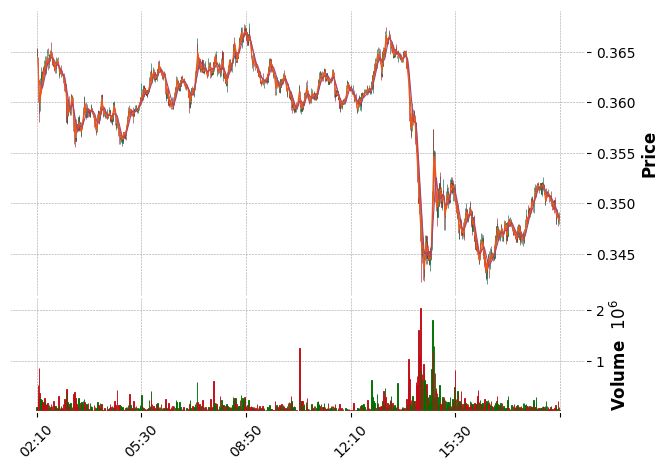

In [ ]:
mpf.plot(hist_df.set_index('open_time').tail(1000), type='candle', style='charles', volume=True, mav=(3,6,9))

In [ ]:
hist_df.to_csv('data/BTCUSDT.csv', index=False)